# DAT205 Short Assignment  - Code
## By Group 1
# Version 1
## Due 2021-02-18

# Code Setup
## 0. Load initial setup
## 1. Upload dataset
## 2. Initial Data Analysis
## 3. Data cleansing/transformation
 3a. Data cleansing of nulls

 3b. Transform all categorical features using LabelEncoder

 3c. Define column as TARGET variable 

 3d. Remove from dataframe the attributes (categorical, Target, and other unwanted)
 
 3e. Create Heat Map / Correlation Matrix

 3f. Remove additional unwanted fields based on Heat Map / Correlation Matrix

 3g. Re-check Heat Map / Correlation Matrix

## 4. Prepare train and test data
## 5. Modeling and Analysis
 5a. Apply Logistic Regression on the split train/test dataset

 5b. Apply Decision Tree on the split train/test dataset

 5c. Apply KNN on the split train/test dataset

 5d. Apply Linear Discriminant Analysis on the split train/test dataset

 5e. Apply Gaussian Naive Bayes on the split train/test dataset

 5f. Apply SVM on the split train/test dataset

 5g. Apply Random Forest Regression on the split train/test dataset
## 6. Cross Validation Scores
## 7. Summary Report


# 0. Load initial setup

In [1]:
# Initialized required packages
# Standard packages
import numpy as np
import pandas as pd
import scipy as sp
import csv

# Graphing packages
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import matplotlib.lines as mlines

# Data preparation
from sklearn.preprocessing import LabelEncoder

# Modeling packages
# import tensorflow as tf
# import sklearn as skl
from sklearn.model_selection import train_test_split

# Regression modeling
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# from sklearn.model_selection import cross_val_score

# Confusion matrix, Accuracy, sensitivity and specificity
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# from sklearn.feature_selection import VarianceThreshold 
from sklearn.feature_selection import RFE 
# from sklearn.feature_selection import RFECV

# Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Following code is being deprecated
# from sklearn.datasets.samples_generator import make_blobs

# Initialize variables if there is any debugging required
# Insert following line and activate the debugging.
# # VALIDATION CODE 
# if debug_active == 'yes':
# 
# Use "display(df)"" if the result command is "df" to retain the same format

debug_active = 'no'
loop_max = 100
# showNumRecs = 15

In [2]:
test_size_val = 0.30
random_state_val = 42

# 1. Upload dataset

In [4]:
# load the file BankChurners.csv
# Note the other option in Jupyter Notebook is to use the upload the csv files before running the code
# df = pd.read_csv('BankChurners.csv')
df = pd.read_excel('BankChurners.xls')

In [5]:
# Validate the data in the dataframe
# VALIDATION CODE 
if debug_active == 'yes':
    display(df)

# 2. Initial Data Analysis

In [6]:
# Examine shape of dataframe
df.shape

(10127, 21)

In [7]:
# Examine the type of attributes in the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   CLIENTNUM                                                              10127 non-null  int64  
 1   Attrition_Flag                                                         10127 non-null  object 
 2   Customer_Age                                                           10127 non-null  int64  
 3   Gender                                                                 10127 non-null  object 
 4   Dependent_count                                                        10127 non-null  int64  
 5   Education_Level                                                        10127 non-null  object 
 6   Marital_Status                                                         10127 non-null 

In [8]:
# Describe the numerical data
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book (Length of relationship with bansk[months]),Total_Relationship_Count (How many products with customer),Months_Inactive_12_mon (Card not used),Contacts_Count_12_mon (Number of contacts in 12 months),Credit_Limit,Total_Revolving_Bal (Balance unpaid at month end),Avg_Open_To_Buy (Difference between the credit limit and the balance),Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),Total_Trans_Amt ( Total Transactions Value 12 months),Total_Trans_Ct (Transaction Count 12 months),Total_Ct_Chng_Q4_Q1 (Change in the transaction amount Q4/Q1),Avg_Utilization_Ratio (Credit usage/Total Credit available)
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# Display the headers of columns that use descriptive or non-numerical values
categorical = df.dtypes[df.dtypes == "object"].index 

# VALIDATION CODE 
if debug_active == 'yes':
    print(categorical)

In [10]:
# Describe the categorical data
df[categorical].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [11]:
# Null field analysis
df_missingDataInfo = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

#Printing the columns with over XX% of missing values (ie 60 = 60%)
null_threshold = 60 
df_missingDataInfo[df_missingDataInfo['Percent'] > null_threshold].sort_values(by=['Percent'])

,Count,Percent


# 3. Data cleansing/transformation

## 3a. Data cleansing of nulls

In [12]:
# Code TBD depending on handling

## 3b. Transform all categorical features using LabelEncoder

In [13]:
# TEST CODE 

# Numerical features
# ['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book (Length of relationship with bansk[months])','Total_Relationship_Count (How many products with customer)','Months_Inactive_12_mon (Card not used)','Contacts_Count_12_mon (Number of contacts in 12 months)','Credit_Limit','Total_Revolving_Bal (Balance unpaid at month end)','Avg_Open_To_Buy (Difference between the credit limit and the balance)','Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1)','Total_Trans_Amt ( Total Transactions Value 12 months)','Total_Trans_Ct (Transaction Count 12 months)','Total_Ct_Chng_Q4_Q1 (Change in the transaction amount Q4/Q1)','Avg_Utilization_Ratio (Credit usage/Total Credit available)']

# Categorical features
# ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_df = df.copy()

lb_make = LabelEncoder()
# cat_list = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
# cat_list_code = ['Gender_code','Education_Level_code','Marital_Status_code','Income_Category_code','Card_Category_code']

for i in categorical:
    val_A = i
    val_B = i + '_code'
    df[(val_B)] = lb_make.fit_transform(df[val_A])

# VALIDATION CODE 
if debug_active == 'yes':
    display(df.head()) #Results in appending a new column to df


## 3c. Define column as TARGET variable 

In [14]:
Y_header_list = 'Attrition_Flag_code'
Y = pd.DataFrame(df[Y_header_list])

# VALIDATION CODE 
if debug_active == 'yes':
    display(Y)

## 3d. Remove from dataframe the attributes (categorical, Target, and other unwanted)

In [15]:
# Define the possible list of features that could predict the TARGET 
X_headers_list = df.columns.tolist()

# Remove Target attribute
X_headers_list.remove(Y_header_list)

# Remove original categorical attributes as there are now encoded equivalent attributes
for i in categorical:
    X_headers_list.remove(i)

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

In [16]:
# Remove unwanted/useless attributes
unwanted_list_01 = ['CLIENTNUM']

for j in unwanted_list_01:
    X_headers_list.remove(j)

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

In [17]:
# Display current dataframe
df = df[X_headers_list]
# VALIDATION CODE 
if debug_active == 'yes':
    display(df.head())

In [18]:
# VALIDATION CODE 
# Examine the type of attributes in the dataframe
df.shape

(10127, 19)

In [19]:
# VALIDATION CODE 
# Examine the type of attributes in the dataframe
df.info()
# Describe the numerical data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Customer_Age                                                           10127 non-null  int64  
 1   Dependent_count                                                        10127 non-null  int64  
 2   Months_on_book (Length of relationship with bansk[months])             10127 non-null  int64  
 3   Total_Relationship_Count (How many products with customer)             10127 non-null  int64  
 4   Months_Inactive_12_mon (Card not used)                                 10127 non-null  int64  
 5   Contacts_Count_12_mon (Number of contacts in 12 months)                10127 non-null  int64  
 6   Credit_Limit                                                           10127 non-null 

,Customer_Age,Dependent_count,Months_on_book (Length of relationship with bansk[months]),Total_Relationship_Count (How many products with customer),Months_Inactive_12_mon (Card not used),Contacts_Count_12_mon (Number of contacts in 12 months),Credit_Limit,Total_Revolving_Bal (Balance unpaid at month end),Avg_Open_To_Buy (Difference between the credit limit and the balance),Total_Amt_Chng_Q4_Q1(Ratio Q4/Q1),Total_Trans_Amt ( Total Transactions Value 12 months),Total_Trans_Ct (Transaction Count 12 months),Total_Ct_Chng_Q4_Q1 (Change in the transaction amount Q4/Q1),Avg_Utilization_Ratio (Credit usage/Total Credit available),Gender_code,Education_Level_code,Marital_Status_code,Income_Category_code,Card_Category_code
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.470919,3.096574,1.463415,2.863928,0.179816
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.499178,1.834812,0.737808,1.504700,0.693039
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,3.000000,1.000000,3.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,1.000000,5.000000,2.000000,4.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000,6.000000,3.000000,5.000000,3.000000


## 3e. Create Heat Map / Correlation Matrix

<AxesSubplot:>

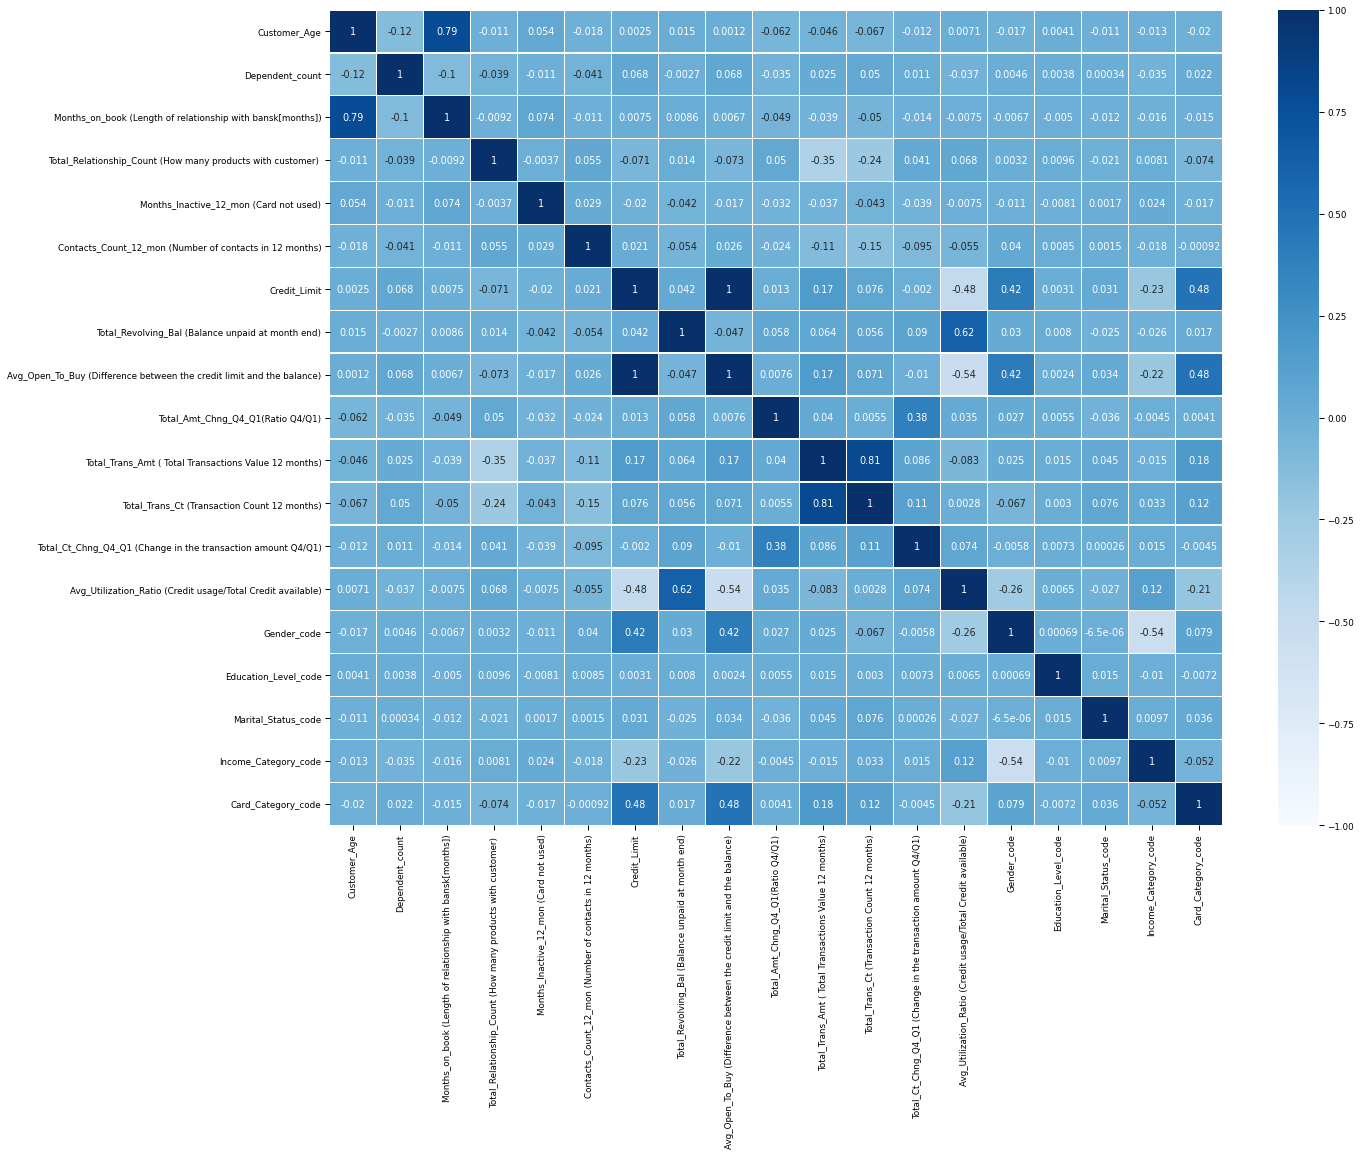

In [20]:
# import seaborn as sns
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
# [BV] finding the correllation matrix and changing the categorical data to category for the plot.
# sns.heatmap(cleanData.assign(Education_Level=cleanData.Education_Level.astype('category').cat.codes,                         
#                          Marital_Status=cleanData.Marital_Status.astype('category').cat.codes,
#                         Income_Category=cleanData.Income_Category.astype('category').cat.codes,
#                         Card_Category =cleanData.Card_Category.astype('category').cat.codes).corr(), 
#                          annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)

sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)


## 3f. Remove additional unwanted fields based on Heat Map / Correlation Matrix

In [21]:
# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

In [22]:
# Remove unwanted/useless attributes
unwanted_list_02 = ['Customer_Age','Avg_Open_To_Buy (Difference between the credit limit and the balance)','Total_Trans_Amt ( Total Transactions Value 12 months)']

for k in unwanted_list_02:
    X_headers_list.remove(k)

# Remaining attributes
# VALIDATION CODE 
if debug_active == 'yes':
    display(X_headers_list)

In [23]:
# Display current dataframe
df = df[X_headers_list]
# VALIDATION CODE 
if debug_active == 'yes':
    display(df.head())

## 3g. Re-check Heat Map / Correlation Matrix

<AxesSubplot:>

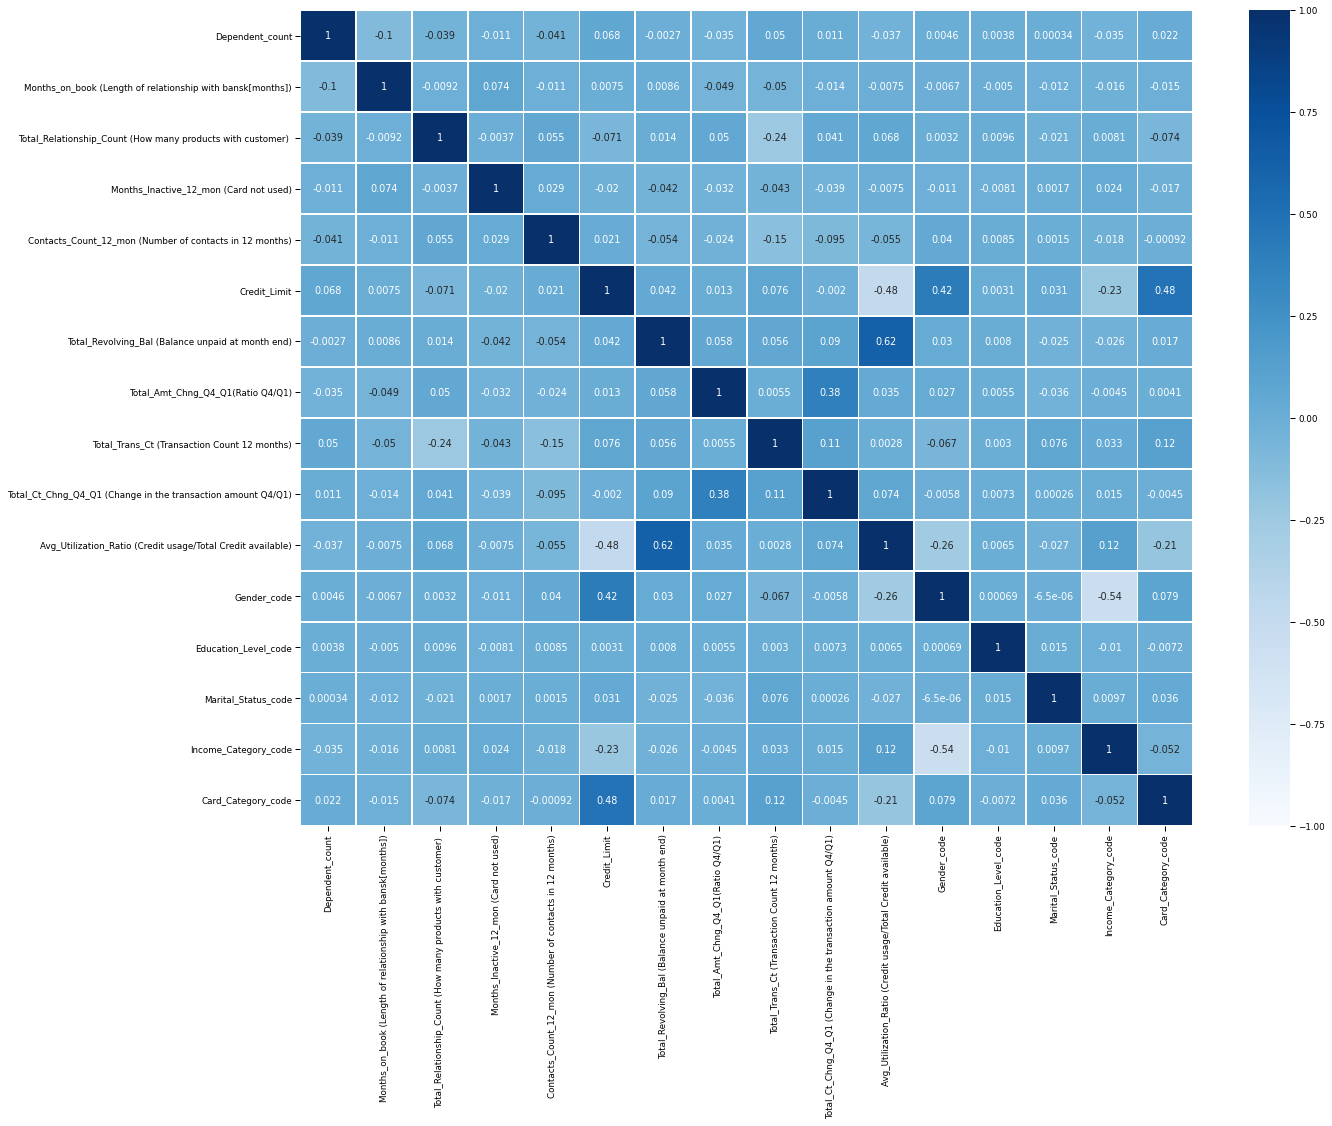

In [24]:
plt.figure(figsize=(20,15))
sns.set_context("paper", font_scale=1)
sns.heatmap(df.corr(), annot=True, cmap='Blues',vmin=-1, vmax=1, square=False, linewidths=0.5)

# 4.	Prepare train and test data


#### Package import is handled in the initial code. Refer to the start of the code (above)

In [25]:
# Define X and fill in NaN with 0
# df_sel_features.fillna(0, inplace=True)
# X = df_sel_features
X = df

# VALIDATION CODE 
if debug_active == 'yes':
    display(X)

In [26]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y)

In [27]:
# Split the code into training and test dataset 0.7/0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size_val, random_state = random_state_val)

# Validate the split at a high level
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7088, 16) (7088, 1)
(3039, 16) (3039, 1)


In [28]:
# Convert to list
Y_test['Attrition_Flag_code'].values.tolist()

# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_test)

In [29]:
# VALIDATION CODE 
if debug_active == 'yes':
    df.to_csv('DAT205_Output_All.csv') 
    X_train.to_csv('DAT205_Output_Split_X_train.csv') 
    X_test.to_csv('DAT205_Output_Split_X_test.csv') 
    Y_train.to_csv('DAT205_Output_Split_Y_train.csv') 
    Y_test.to_csv('DAT205_Output_Split_Y_test.csv') 

# 5. Modeling and Analysis

## 5a. Apply Logistic Regression on the split train/test dataset

In [30]:
# Notes
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=0, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False)

# Create the model
LogRegM = LogisticRegression(solver='liblinear', random_state = 0)

# Train the model
LogRegM.fit(X_train, Y_train)

# Predict using test data
Y_pred = LogRegM.predict(X_test)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [31]:
# VALIDATION CODE 
if debug_active == 'yes':
    display(Y_pred)

## Confusion Matrix Analysis Notes
https://www.google.com/search?q=confusion+matrix&rlz=1C1GCEA_enCA849CA849&oq=confusion+&aqs=chrome.1.69i57j0i433l2j0j0i433j0l5.2966j0j7&sourceid=chrome&ie=UTF-8

## Analysis score notes 
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

### Compute your model’s analysis

In [32]:
accuracy_score_LogRegM = accuracy_score(Y_test, Y_pred)
f1_score_LogRegM = f1_score(Y_test, Y_pred)
recall_score_LogRegM = recall_score(Y_test, Y_pred)
precision_score_LogRegM = precision_score(Y_test, Y_pred)
classification_report_LogRegM = classification_report(Y_test, Y_pred)
confusion_matrix_LogRegM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LogRegM
sensitivity_LogRegM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LogRegM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_LogRegM)
    print('F1 score:', f1_score_LogRegM)
    print('Recall:', recall_score_LogRegM)
    print('Precision:', precision_score_LogRegM)
    print('Sensitivity : ', sensitivity_LogRegM)
    print('Specificity : ', specificity_LogRegM)
    print('\n clasification report:\n', classification_report_LogRegM)
    print('\n confussion matrix:\n',confusion_matrix_LogRegM)

In [33]:
# Feature Importance
importance = LogRegM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LogRegM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LogRegM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LogRegM

# plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()



## 5b. Apply Decision Tree on the split train/test dataset

In [34]:
# Create the model
DTM = DecisionTreeClassifier()

# Train the model
DTM.fit(X_train, Y_train)

# Predict using test data
Y_pred = DTM.predict(X_test)

In [35]:
accuracy_score_DTM = accuracy_score(Y_test, Y_pred)
f1_score_DTM = f1_score(Y_test, Y_pred)
recall_score_DTM = recall_score(Y_test, Y_pred)
precision_score_DTM = precision_score(Y_test, Y_pred)
classification_report_DTM = classification_report(Y_test, Y_pred)
confusion_matrix_DTM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_DTM
sensitivity_DTM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_DTM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_DTM)
    print('F1 score:', f1_score_DTM)
    print('Recall:', recall_score_DTM)
    print('Precision:', precision_score_DTM)
    print('Sensitivity : ', sensitivity_DTM)
    print('Specificity : ', specificity_DTM)
    print('\n clasification report:\n', classification_report_DTM)
    print('\n confussion matrix:\n',confusion_matrix_DTM)

In [36]:
# Feature Importance
importance = DTM.feature_importances_
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_DTM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_DTM.sort_values('Feature Importance', ascending=False, inplace=True)

# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_DTM

In [37]:
# Create a decision tree plot

# [DH] Turn off for now
# tree.plot_tree(DTM)

## 5c. Apply KNN on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [38]:
# Create the model
KNNM = KNeighborsClassifier(n_neighbors=3)

# Train the model
KNNM.fit(X_train, Y_train)

# Predict using test data
Y_pred = KNNM.predict(X_test)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
accuracy_score_KNNM = accuracy_score(Y_test, Y_pred)
f1_score_KNNM = f1_score(Y_test, Y_pred)
recall_score_KNNM = recall_score(Y_test, Y_pred)
precision_score_KNNM = precision_score(Y_test, Y_pred)
classification_report_KNNM = classification_report(Y_test, Y_pred)
confusion_matrix_KNNM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_KNNM
sensitivity_KNNM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_KNNM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_KNNM)
    print('F1 score:', f1_score_KNNM)
    print('Recall:', recall_score_KNNM)
    print('Precision:', precision_score_KNNM)
    print('Sensitivity : ', sensitivity_KNNM)
    print('Specificity : ', specificity_KNNM)
    print('\n clasification report:\n', classification_report_KNNM)
    print('\n confussion matrix:\n',confusion_matrix_KNNM)

## 5d. Apply Linear Discriminant Analysis on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [40]:
# Create the model
LDAM = LinearDiscriminantAnalysis()

# Train the model
LDAM.fit(X_train, Y_train)

# Predict using test data
Y_pred = LDAM.predict(X_test)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
accuracy_score_LDAM = accuracy_score(Y_test, Y_pred)
f1_score_LDAM = f1_score(Y_test, Y_pred)
recall_score_LDAM = recall_score(Y_test, Y_pred)
precision_score_LDAM = precision_score(Y_test, Y_pred)
classification_report_LDAM = classification_report(Y_test, Y_pred)
confusion_matrix_LDAM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_LDAM
sensitivity_LDAM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_LDAM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_LDAM)
    print('F1 score:', f1_score_LDAM)
    print('Recall:', recall_score_LDAM)
    print('Precision:', precision_score_LDAM)
    print('Sensitivity : ', sensitivity_LDAM)
    print('Specificity : ', specificity_LDAM)
    print('\n clasification report:\n', classification_report_LDAM)
    print('\n confussion matrix:\n',confusion_matrix_LDAM)

In [42]:
# Feature Importance
importance = LDAM.coef_[0]
array_importance=[]
# summarize feature importance
for i,v in enumerate(importance):
    array_importance.append(v)
    # print('Feature: %0d, Score: %.5f' % (i,v))

# # Convert to dataframe feature_importances results
df_feature_importance_values = pd.DataFrame(array_importance)
df_feature_importance_values.rename(columns={0:'Feature Importance'}, inplace=True)

# # Convert to dataframe feature labels
df_feature_names = pd.DataFrame(list(X.columns))
df_feature_names.rename(columns={0:'Feature'}, inplace=True)

# # Merge the dataframes for feature labels and feature_importances results
df_feature_importance_LDAM = pd.concat([df_feature_names, df_feature_importance_values], axis=1)
# df_feature_importance

df_feature_importance_LDAM.sort_values('Feature Importance', ascending=False, inplace=True)
# VALIDATION CODE 
if debug_active == 'yes':
    df_feature_importance_LDAM

## 5e. Apply Gaussian Naive Bayes on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Alternate model Gaussian Process Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [43]:
# Create the model
GNBM = GaussianNB()

# Train the model
GNBM.fit(X_train, Y_train)

# Predict using test data
Y_pred = GNBM.predict(X_test)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
accuracy_score_GNBM = accuracy_score(Y_test, Y_pred)
f1_score_GNBM = f1_score(Y_test, Y_pred)
recall_score_GNBM = recall_score(Y_test, Y_pred)
precision_score_GNBM = precision_score(Y_test, Y_pred)
classification_report_GNBM = classification_report(Y_test, Y_pred)
confusion_matrix_GNBM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_GNBM
sensitivity_GNBM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_GNBM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_GNBM)
    print('F1 score:', f1_score_GNBM)
    print('Recall:', recall_score_GNBM)
    print('Precision:', precision_score_GNBM)
    print('Sensitivity : ', sensitivity_GNBM)
    print('Specificity : ', specificity_GNBM)
    print('\n clasification report:\n', classification_report_GNBM)
    print('\n confussion matrix:\n',confusion_matrix_GNBM)

## 5f. Apply SVM on the split train/test dataset

https://scikit-learn.org/stable/modules/svm.html

In [45]:
# Create the model
SVMM = SVC()

# Train the model
SVMM.fit(X_train, Y_train)

# Predict using test data
Y_pred = SVMM.predict(X_test)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
accuracy_score_SVMM = accuracy_score(Y_test, Y_pred)
f1_score_SVMM = f1_score(Y_test, Y_pred)
recall_score_SVMM = recall_score(Y_test, Y_pred)
precision_score_SVMM = precision_score(Y_test, Y_pred)
classification_report_SVMM = classification_report(Y_test, Y_pred)
confusion_matrix_SVMM = confusion_matrix(Y_test, Y_pred)
cm = confusion_matrix_SVMM
sensitivity_SVMM = cm[0,0]/(cm[0,0]+cm[0,1])
specificity_SVMM = cm[1,1]/(cm[1,0]+cm[1,1])

# VALIDATION CODE 
if debug_active == 'yes':
    print('Accuracy:', accuracy_score_SVMM)
    print('F1 score:', f1_score_SVMM)
    print('Recall:', recall_score_SVMM)
    print('Precision:', precision_score_SVMM)
    print('Sensitivity : ', sensitivity_SVMM)
    print('Specificity : ', specificity_SVMM)
    print('\n clasification report:\n', classification_report_SVMM)
    print('\n confussion matrix:\n',confusion_matrix_SVMM)

C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dennis\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 5g. Apply Random Forest Regression on the split train/test dataset

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [47]:
# # Create the model
# RFM = RandomForestRegressor()

# # Train the model
# RFM.fit(X_train, Y_train)

# # Predict using test data
# Y_pred = RFM.predict(X_test)

# 6. Cross Validation Scores

In [50]:
# seed = random_state_val
seed = 0

loan_models = []
loan_models.append(('Logistic Regression', LogisticRegression()))
loan_models.append(('Decision Tree', DecisionTreeClassifier()))
loan_models.append(('KNN', KNeighborsClassifier()))
loan_models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
loan_models.append(('Gaussian', GaussianNB()))
loan_models.append(('SVM', SVC()))

cross_val_scores = []
model_keys = []

df_cross_val_score = []
df_cross_val_score_headers = [0,1,2,3]
df_cross_val_score = pd.DataFrame (df_cross_val_score, columns = df_cross_val_score_headers)
df_Addscore = []
scoring = 'accuracy'
for model_key, loan_model in loan_models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cross_val_score = model_selection.cross_val_score(loan_model, X_train, Y_train, cv=kfold, scoring=scoring)
    cross_val_scores.append(cross_val_score)
    model_keys.append(model_key)
    msg = "%s: cross val mean -> %f , cross val std -> %f, kfold variance -> %f" % (model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var())
    df_Addscore = pd.Series([model_key, cross_val_score.mean(), cross_val_score.std(), cross_val_score.var()])
    df_cross_val_score = df_cross_val_score.append(df_Addscore, ignore_index=True)
    print(msg)

df_cross_val_score.columns = ['Model_Key','Cross_Value_Score_Mean','Cross_Value_Score_STD','Cross_Value_Score_Var']
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_cross_val_score)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
# boxplot algorithm comparison
plt.rcParams["figure.figsize"] = (15,10)
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
sns.boxplot(x = model_keys, y=cross_val_scores, palette = 'Blues')
plt.show()

# 7. Summary Report

In [ ]:
# Create summary table of metric analysis
df_Metrics = []

df_Metrics_headers = [0,1,2,3,4,5,6]
df_Metrics = pd.DataFrame (df_Metrics, columns = df_Metrics_headers)

df_AddModel = pd.Series(['Logistic Regression', accuracy_score_LogRegM,f1_score_LogRegM,recall_score_LogRegM,precision_score_LogRegM,sensitivity_LogRegM,specificity_LogRegM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)
df_AddModel = pd.Series(['Decision Tree',accuracy_score_DTM,f1_score_DTM,recall_score_DTM,precision_score_DTM,sensitivity_DTM,specificity_DTM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)
df_AddModel = pd.Series(['K Nearest Neighbors',accuracy_score_KNNM,f1_score_KNNM,recall_score_KNNM,precision_score_KNNM,sensitivity_KNNM,specificity_KNNM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)
df_AddModel = pd.Series(['Linear Discriminant Analysis',accuracy_score_LDAM,f1_score_LDAM,recall_score_LDAM,precision_score_LDAM,sensitivity_LDAM,specificity_LDAM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)
df_AddModel = pd.Series(['Gaussian Naive Bayes',accuracy_score_GNBM,f1_score_GNBM,recall_score_GNBM,precision_score_GNBM,sensitivity_GNBM,specificity_GNBM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)
df_AddModel = pd.Series(['SVM',accuracy_score_SVMM,f1_score_SVMM,recall_score_SVMM,precision_score_SVMM,sensitivity_SVMM,specificity_SVMM])
df_Metrics = df_Metrics.append(df_AddModel, ignore_index=True)

df_Metrics.columns = ['Model','Accuracy','F1 score','Recall','Precision','Sensitivity','Specificity']

# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Metrics)

# Join dataframes for Metrics and cross_val_scores
df_Summary = pd.concat([df_Metrics,df_cross_val_score], axis=1)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)

In [ ]:
# Clean up columns by dropping columns of duplicate data (Model_Key)
df_Summary.drop(['Model_Key'], axis=1, inplace=True)
# df_Summary.drop(columns=['Model_Key'], inplace=True)
# VALIDATION CODE 
if debug_active == 'yes':
    display(df_Summary)


In [ ]:
print("================= Results Summary ==================\n")

print("==================== Attributes ======================")
print('----------------- Removed attributes -----------------')
display(unwanted_list_01)
print('\n------ Removed attributes - Heat Map / Correlation Matrix ---- ')
display(unwanted_list_02)

print('\n------------------- Applied attributes --------------------')
display(X_headers_list)

print("\n ================= Model Analysis Summary ==================\n")
display(df_Summary)

print('\n\n----------------- Logistic Regression --------------------')
print('\n clasification report:\n', classification_report_LogRegM)
print('\n confussion matrix:\n',confusion_matrix_LogRegM)
print("\nFeature Importance")
display(df_feature_importance_LogRegM)

print('\n\n-------------------- Decision Tree -----------------------\n')
print('\n clasification report:\n', classification_report_DTM)
print('\n confussion matrix:\n',confusion_matrix_DTM)
print("\nFeature Importance")
display(df_feature_importance_DTM)

print('\n\n------------- Linear Discriminant Analysis ---------------\n')
print('\n clasification report:\n', classification_report_LDAM)
print('\n confussion matrix:\n',confusion_matrix_LDAM)
print("\nFeature Importance")
display(df_feature_importance_LDAM)



# End of Code